# Bike Sharing Case Study - Lakshmi Narashimman

## Step 1: Importing the libraries 

In [47]:
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

## Step 2: Reading and Understanding the data

In [4]:
# Reading the csv file using the Pandas 

bikesharing = pd.read_csv("day.csv")

In [5]:
# Observe the first few rows 

bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# Checking the shape of the table bike sharing 
# There are totally 730 rows and 16 columns in the bikesharing table

bikesharing.shape

(730, 16)

In [9]:
# Check the bikesharing dataframe and see if there are any null values 

bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
# Obtain the details of numerical data variables with the help of a summary function

bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
# Checking the columns of the bikesharing dataframe 

bikesharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
# Checking the size of the bikesharing dataframe

bikesharing.size

11680

In [14]:
# Checking axis of bikesharing dataframe 

bikesharing.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [15]:
# Verifying the dimensions of the bikesharing data

bikesharing.ndim

2

In [16]:
# Checking the values of the bikesharing dataframe 

bikesharing.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

## Step 3: Data Preprocessing and Exploratory Data Analysis (EDA)

In [18]:
# Building a variable days_old_business before removing the dtedays

bikesharing["days_old_business"] = (pd.to_datetime(bikesharing['dteday'],format= '%d-%m-%Y') - 
                                    pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [19]:
# Inspect the dataframe

bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old_business
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [20]:
# As we have month. holiday. weekday variables, let us drop the dteday variable

bikesharing.drop(["dteday"], axis = 1, inplace=True)


# As the instant column has nothing to do with the target variable

bikesharing.drop(["instant"], axis = 1, inplace=True)


# As we cnt column that is a sum of both casual and registered users, we will drop the casual and registered users column

bikesharing.drop(["casual"], axis = 1, inplace=True)
bikesharing.drop(["registered"], axis = 1, inplace=True)

In [21]:
# Inspecting the variables after dropping the old variables not suited for our analysis 

bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old_business
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [22]:
# Checking the info for the new bikesharing dataframe after dropping unnecessary variables

bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             730 non-null    int64  
 1   yr                 730 non-null    int64  
 2   mnth               730 non-null    int64  
 3   holiday            730 non-null    int64  
 4   weekday            730 non-null    int64  
 5   workingday         730 non-null    int64  
 6   weathersit         730 non-null    int64  
 7   temp               730 non-null    float64
 8   atemp              730 non-null    float64
 9   hum                730 non-null    float64
 10  windspeed          730 non-null    float64
 11  cnt                730 non-null    int64  
 12  days_old_business  730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [23]:
# Looking at some categorical variables 

bikesharing.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [24]:
bikesharing.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [25]:
# Looking at the correlation for bikesharing

bikesharing.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old_business
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183,-0.001182
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640,-0.015171
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


In [ ]:
# Although season, month, weekday, or weathersit are non-numerical variables, they are mentioned as numerical variables

### Handle Missing values 

In [27]:
bikesharing.isnull().sum()

season               0
yr                   0
mnth                 0
holiday              0
weekday              0
workingday           0
weathersit           0
temp                 0
atemp                0
hum                  0
windspeed            0
cnt                  0
days_old_business    0
dtype: int64

#### As of now there are no missing values in the bikesharing dataframe. 

### Outlier Analysis

In [28]:
bikesharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'days_old_business'],
      dtype='object')

In [29]:
# Finding unique number of values in all columns

bikesharing.nunique()

season                 4
yr                     2
mnth                  12
holiday                2
weekday                7
workingday             2
weathersit             3
temp                 498
atemp                689
hum                  594
windspeed            649
cnt                  695
days_old_business    730
dtype: int64

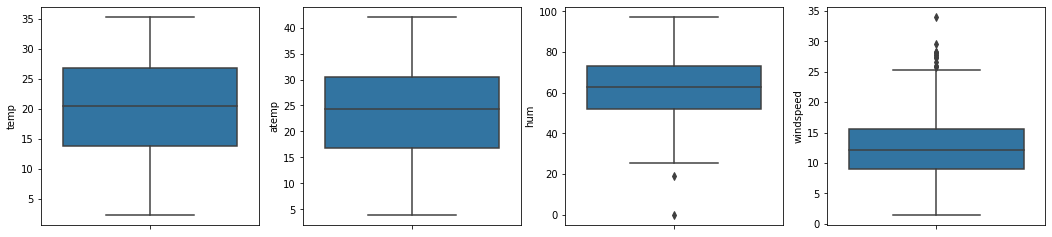

In [30]:
#### Creating boxplots for independent variables with continuous values 

cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikesharing)
    i+=1

#### As there are no any outliers to be handled from these above boxplots, let us move on to exploratory data analysis stage. 

### Exploratory Data Analysis (EDA)

In [42]:
### Converting season, weathersit, months and weekday as a categorical string variable 

bikesharing.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikesharing.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikesharing.mnth = bikesharing.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikesharing.weekday = bikesharing.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old_business
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


### Let us draw pairplots to check the linear relationshop between the variables

<Figure size 1080x2160 with 0 Axes>

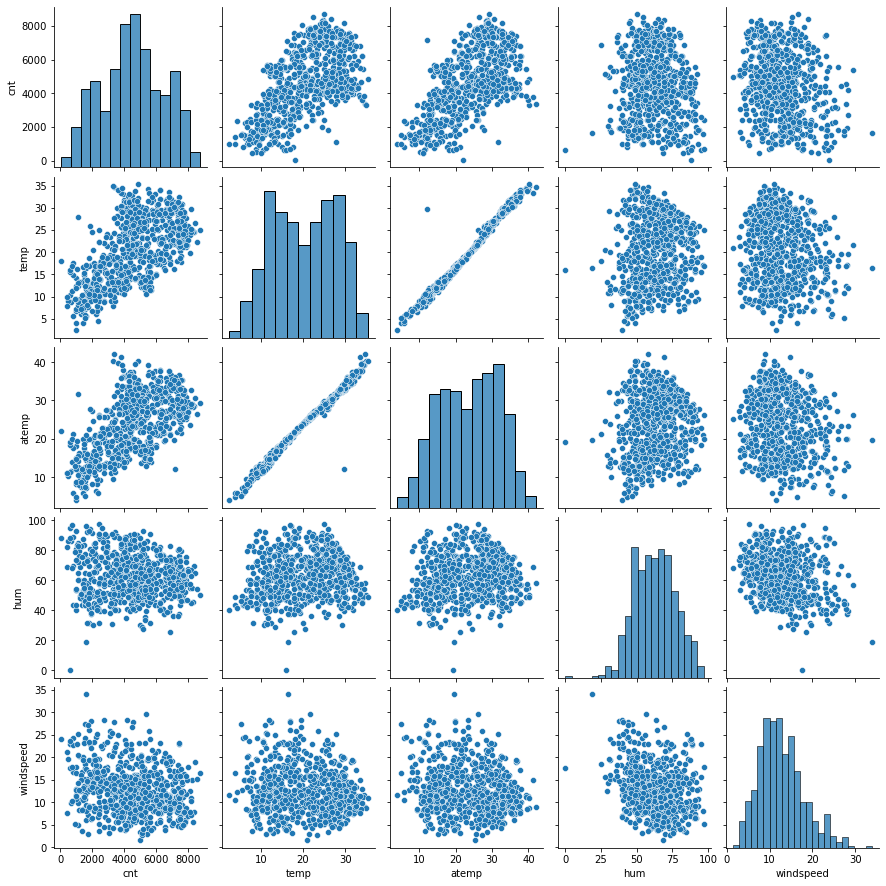

In [32]:
#Drawing pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bikesharing,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### Among numeric independent variables, Temp and atemp variables have the highest positive correlation with the target variable 

#### cnt. It is evident from the above pariplots that show the scatterplots of relationship with the cnt variable. 

<Figure size 1440x1080 with 0 Axes>

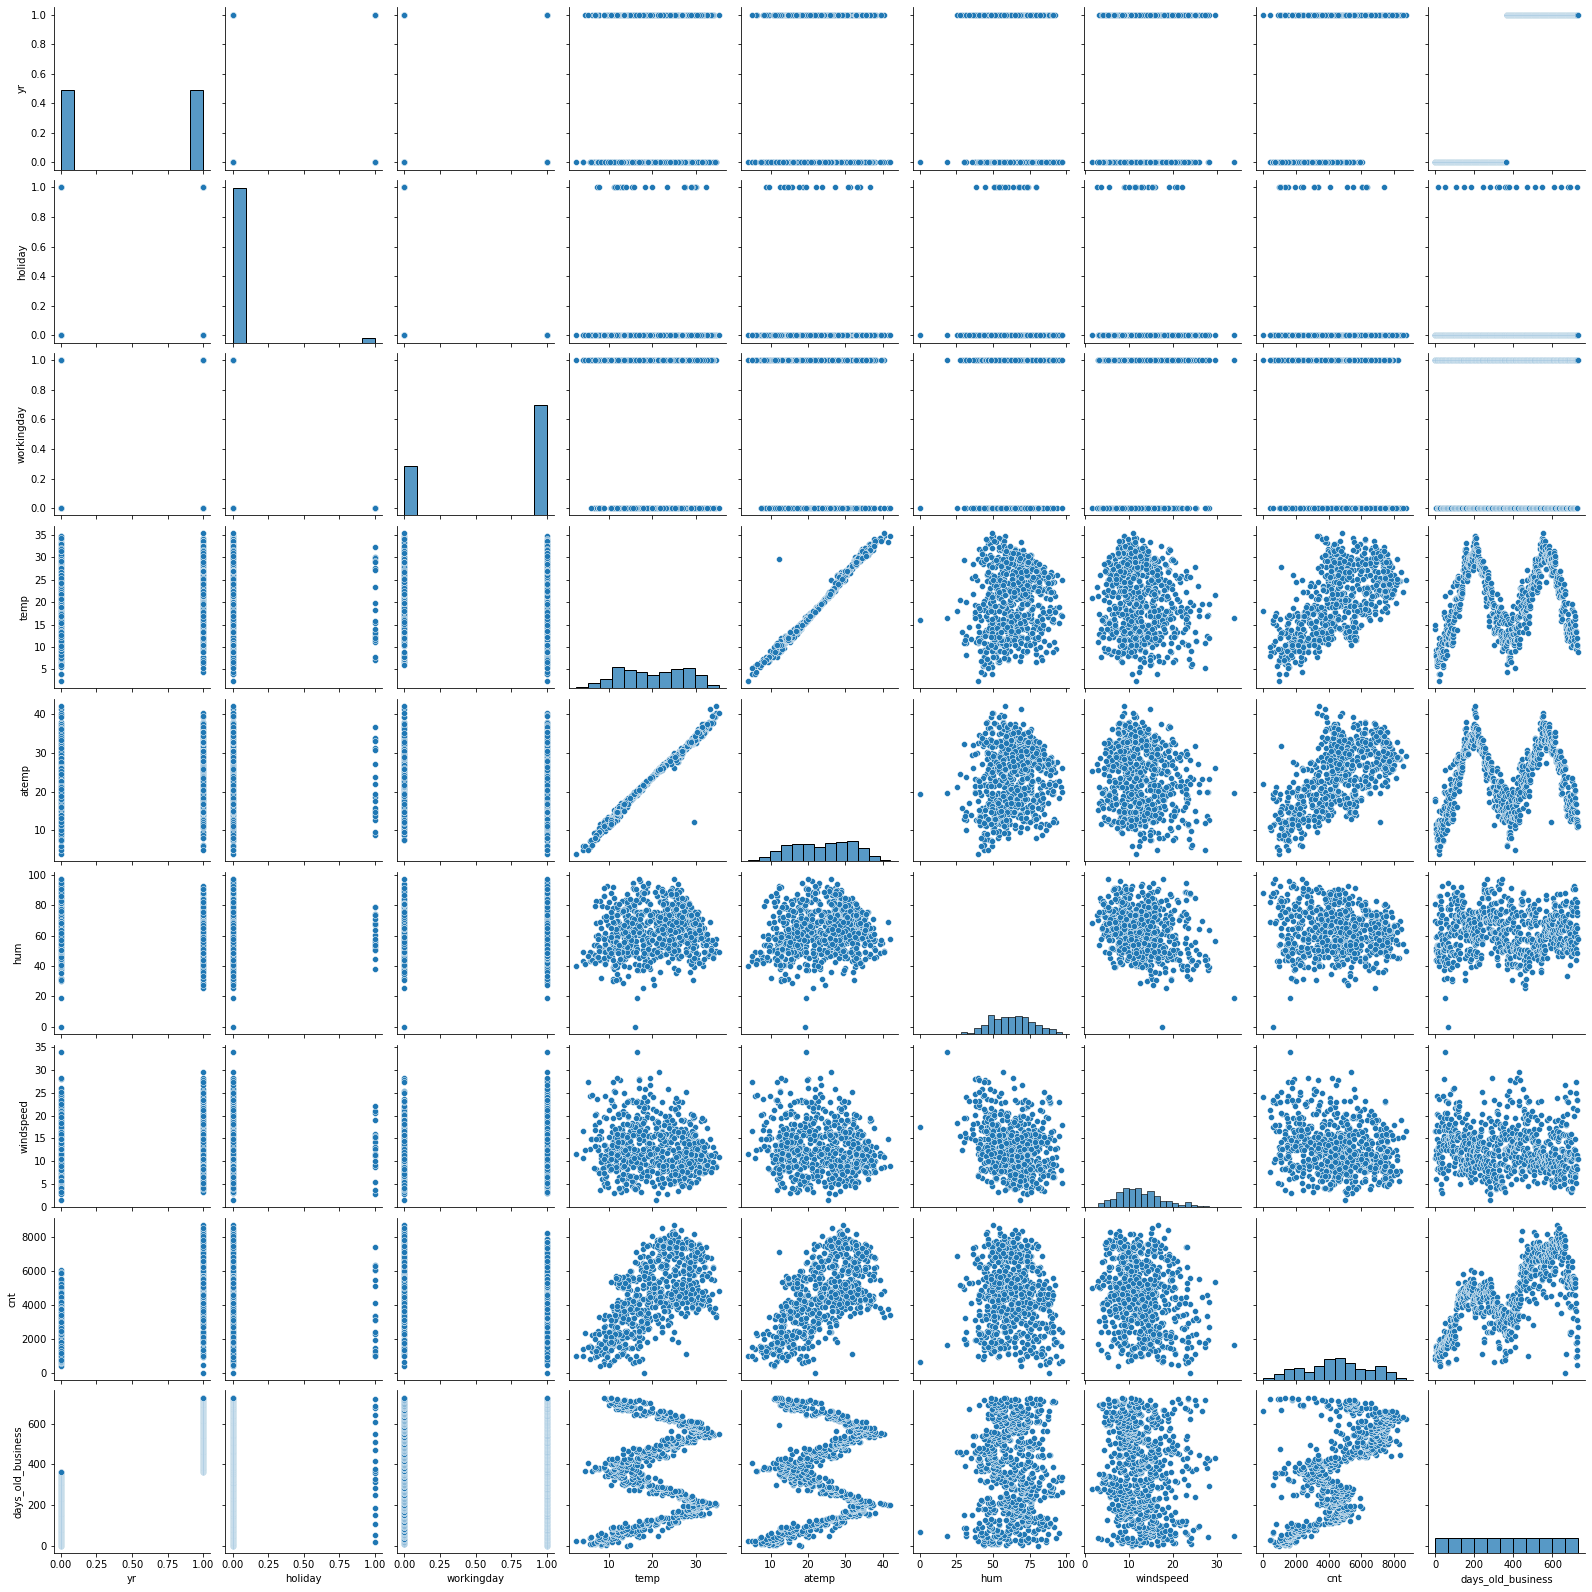

In [33]:
# Visualizing the data to check the correlation between all the numerical variables

plt.figure(figsize=(20,15))
sns.pairplot(bikesharing)
plt.show()

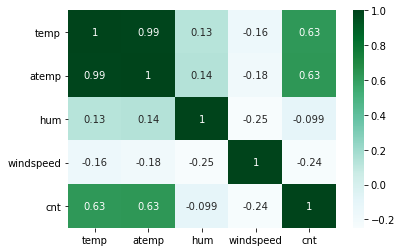

In [34]:
# Let us draw a heatmap to check the relationship of continuous variable to each other

sns.heatmap(bikesharing[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

#### Atemp and temp together have correlation that is higher than 0.99

#### This shows that we have to drop atemp variable as it is highly correlated with temp 0.99

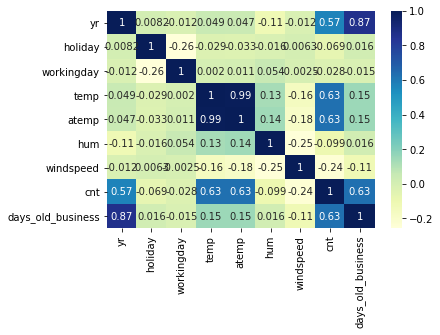

In [36]:
#Correlations for numeric variables

cor=bikesharing.corr()
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
## Draw a heatmap for all correlation between all variables in bikesharing dataframe

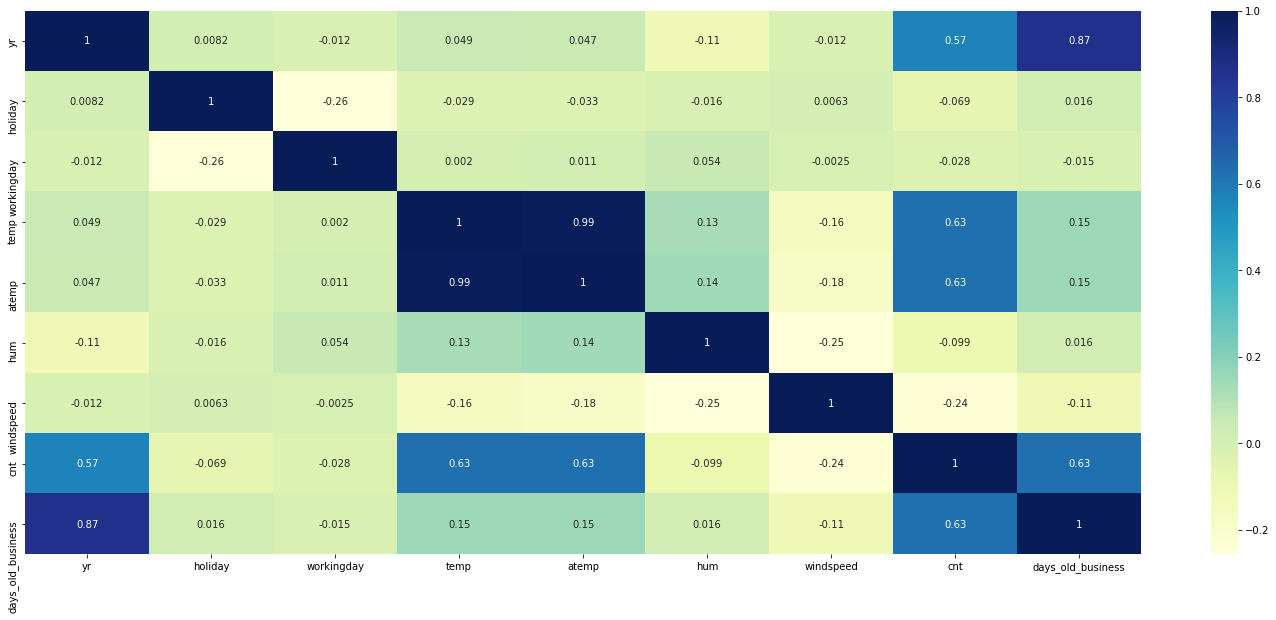

In [35]:
#Calculate Correlation
corr = bikesharing.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

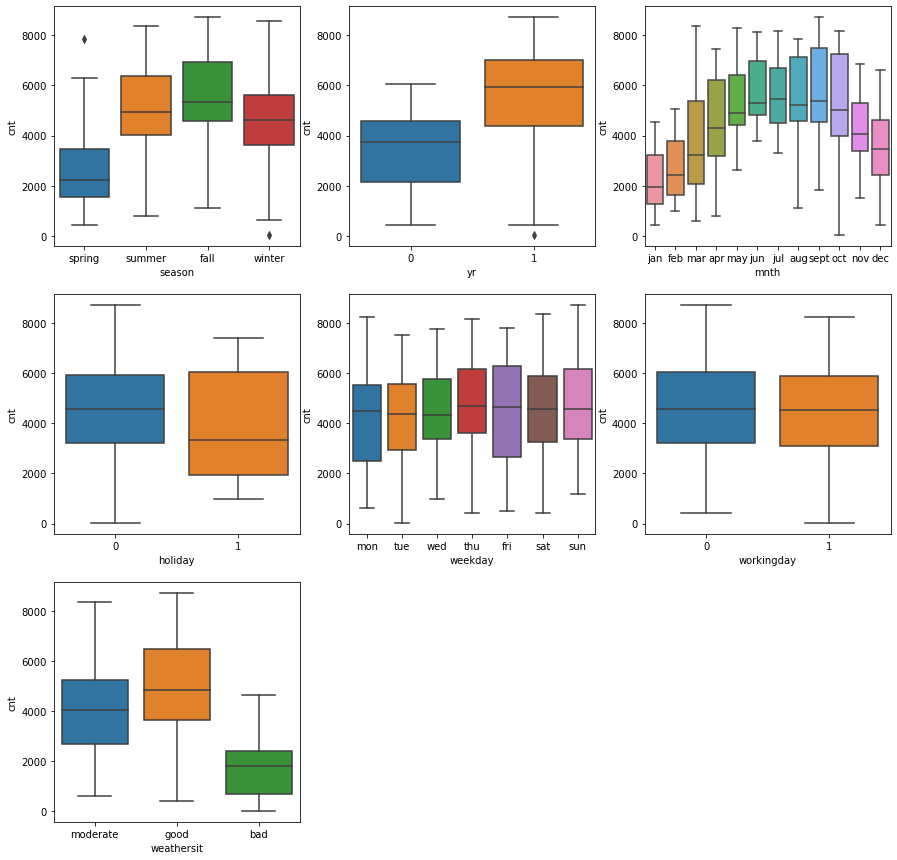

In [37]:
# Let us analyze the correlation os categorical independent variables with target variable cnt using a heatmap

vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikesharing, x=i[1], y='cnt')
plt.show()

#### Some inferences I have drawn 

1. Fall has the highest demand for bikes than any other season
2. Demand for bikes has grown during 2019 
3. The month of September has the highest demand for bikes than other months 
4. Demand for bikes is continuously growing from the month of Jan to the month of June
5. We do not get a clear picture of demand during the weekdays
6. Good weathersit has highest demand for bikes
7. Bike sharing is highest in September. But it falls during beginning and ending months of the year before that

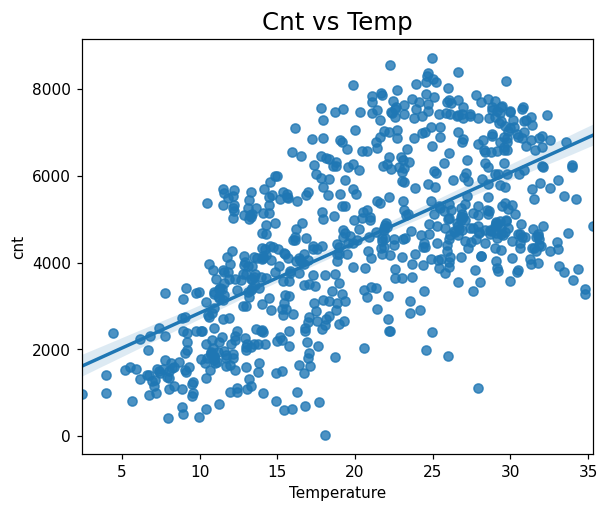

In [38]:
# Drawing a regplot between cnt and temperature

plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bikesharing,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

#### Demand for bikes has positive correlation with temperature. CNT linearly increases with temperature

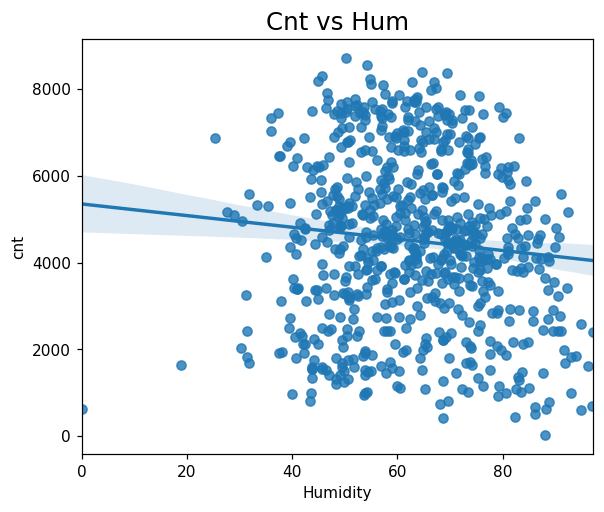

In [39]:
# Drawing regplot for humidity and cnt 

plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bikesharing,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

#### Though we can see humidity decreasing with cnt, the points of this relationship seems scattered around

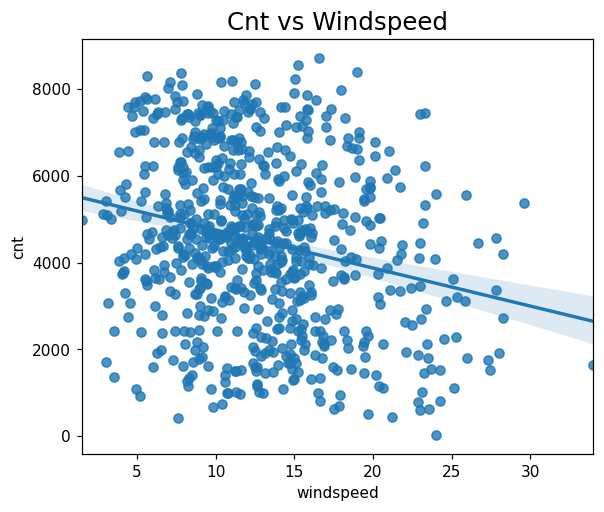

In [40]:
# Drawing the regplot for CNT and windspeed

plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bikesharing,y="cnt",x="windspeed")
plt.show()

#### Though we can see windspeed values decreasing with cnt, the points of this relationship seems scattered around

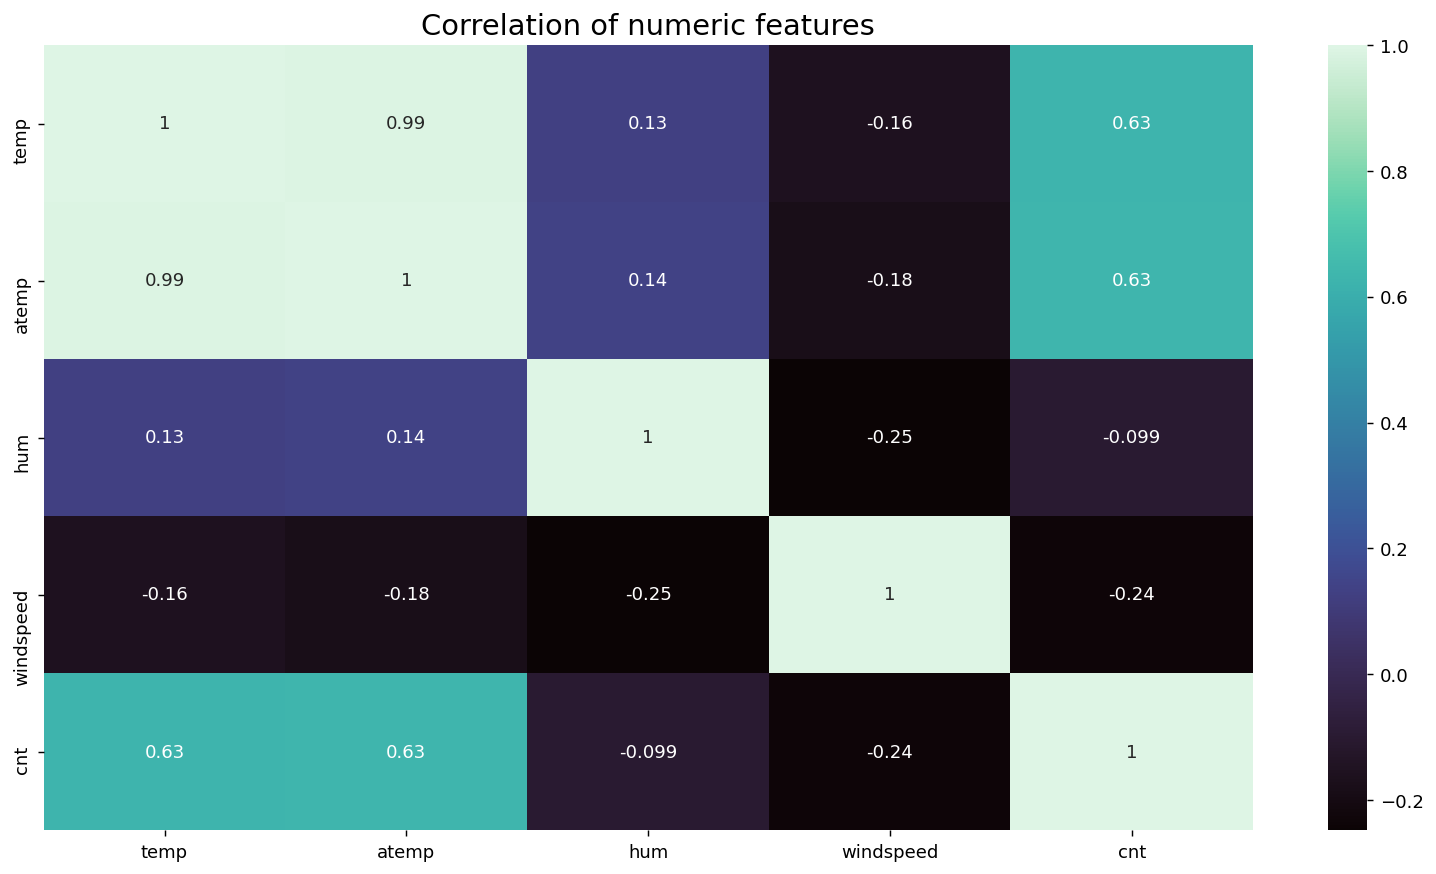

In [41]:
## Correlation of numerical independent variables with target variable CNT 

num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(bikesharing[num_features].corr(),annot= True,cmap="mako")
plt.show()

#### Though temp and atemp are correlated with each other, let us keep them for analysis as they are highly correlated with target variable cnt

## Step 4: Preparing the data for linear regression

In [43]:
# Let us create dummy variables for all categorical variables 

bikesharing = pd.get_dummies(data=bikesharing,columns=["season","mnth","weekday"],drop_first=True)
bikesharing = pd.get_dummies(data=bikesharing,columns=["weathersit"])

1. We are dropping the first column as p-1 can explain the p-categories of dummies in season, month and weekday
2. We can lose the info about severe weather situation, hence we have not used the drop_first in weathersit

In [44]:
# Check columns after creating dummies

bikesharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old_business', 'season_spring', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [46]:
# Let us inspect the first few rows 

bikesharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old_business,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


## Step 5: Building the linear regression model

### Splitting the data into training set and test set 

In [48]:
# Check the bikesharing dataframe shape before splitting it

bikesharing.shape

(730, 32)

In [49]:
#y to contain only target variable
y = bikesharing.pop('cnt')

#X is all remainign variable also our independent variables
X = bikesharing

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
#Inspect independent variables from the bikesharing dataframe

X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old_business,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,0,1,0


In [51]:
# Checking shape and size for train and test

print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


### Feature scaling the continuous variables 

In [53]:
# Let us scale all continuous variables from bikesharing dataframe
num_vars = ['temp','atemp','hum','windspeed','days_old_business']

#Use Normalizing min-max scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [54]:
#Inspect descriptive stats from Training set after scaling the variables


X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old_business,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873,0.512409,0.230920,0.258317,...,0.09002,0.148728,0.142857,0.133072,0.135029,0.156556,0.133072,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619,0.292268,0.421834,0.438138,...,0.28649,0.356169,0.350270,0.339986,0.342090,0.363738,0.339986,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
X_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old_business,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.936900,0,0,...,0,0,0,0,0,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.884774,0,0,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.223594,0,1,...,0,0,0,0,0,0,1,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.493827,1,0,...,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.877915,0,0,...,0,0,0,0,1,0,0,0,0,1


### Building a model with Recursive Feature elimination (Automated method)

In [56]:
# Build a Lienar Regression model using SKLearn for RFE

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [57]:
#Let us cut down number of features to 15 using automated approach RFE

rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [58]:
#Display the columns selected by RFE and their weights

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 15),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old_business', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_aug', False, 4),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 11),
 ('mnth_jan', False, 7),
 ('mnth_jul', False, 12),
 ('mnth_jun', False, 5),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', False, 3),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 16),
 ('weekday_sun', False, 14),
 ('weekday_thu', False, 17),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 9),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 6)]

### Manual elimination 

In [59]:
# Create a function to build a model using statsmodel.api

def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [60]:
# Create a function to calculate Variance Inflation Factor (VIF) function 

def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [61]:
# Let us print columns selected by RFE for manual elimination and model building

X_train.columns[rfe.support_]


Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed',
       'days_old_business', 'season_spring', 'season_winter', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'mnth_sept', 'weathersit_bad',
       'weathersit_good'],
      dtype='object')

In [62]:
# Let us print to columns not selected by RFE to just see the columns that RFE dropped 

X_train.columns[~rfe.support_]


Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_nov', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_moderate'],
      dtype='object')

In [63]:
# Let us take the 15 columns that RFE has selected for building the regression model 

X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

## Step 6: Building the linear regression model after finalized list of variables

### Model 1: Let us start with all the variables selected by RFE

In [64]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     165.0
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.70e-181
Time:                        20:41:43   Log-Likelihood:                -4134.9
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     495   BIC:                             8370.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2809.2461    

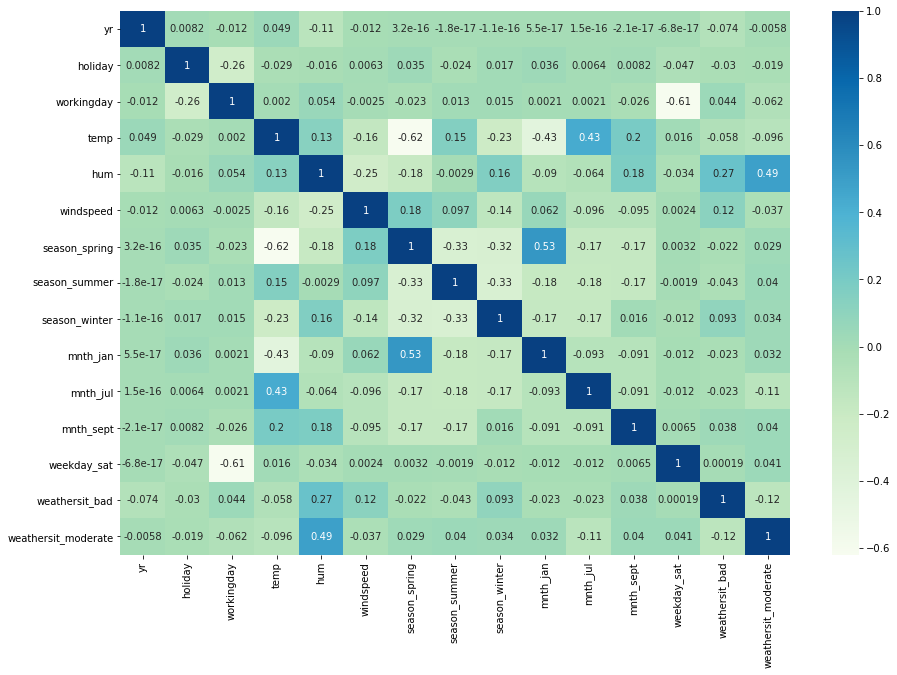

In [66]:
# Checking correlation of features selected by RFE with target column cnt. 
# Also to check impact of different features on target variable cnt.

plt.figure(figsize = (15,10))
sns.heatmap(bikesharing[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

### Model 2: Building a model after dropping mnth_jan as it has high p-value and negative coefficient

In [67]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.1
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.35e-182
Time:                        20:43:59   Log-Likelihood:                -4135.0
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     496   BIC:                             8363.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2792.2799    

### Model 3: As all columns have low p-values, let us check VIF

In [68]:
# Dropping hum variable as it has high VIF

cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     183.6
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          3.37e-180
Time:                        20:46:17   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8315.
Df Residuals:                     497   BIC:                             8374.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2004.0762    

### Model 4: Dropping variable holiday due to its high negative coefficient

In [69]:
# Dropping the variable holiday as it has negative coefficient
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.1
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.51e-178
Time:                        20:49:28   Log-Likelihood:                -4150.1
No. Observations:                 511   AIC:                             8326.
Df Residuals:                     498   BIC:                             8381.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1845.8415    

### Model 5

In [70]:
# Dropping the variable mnth_jul as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.0
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          8.20e-179
Time:                        20:50:31   Log-Likelihood:                -4152.2
No. Observations:                 511   AIC:                             8328.
Df Residuals:                     499   BIC:                             8379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1779.2943    

### Model 6

In [71]:
# Dropping the variable temp as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     156.8
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          4.14e-147
Time:                        20:51:03   Log-Likelihood:                -4229.9
No. Observations:                 511   AIC:                             8482.
Df Residuals:                     500   BIC:                             8528.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5070.0855    

### Model 7

In [72]:
## Trying to replace July with spring as both were highly correlated

cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     74.53
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           1.84e-92
Time:                        20:52:01   Log-Likelihood:                -4359.5
No. Observations:                 511   AIC:                             8741.
Df Residuals:                     500   BIC:                             8788.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3428.8800    

### Model 8

In [73]:
# Removing windspeed with spring as windspeed was highly correlated with temp
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     148.1
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.75e-142
Time:                        20:53:00   Log-Likelihood:                -4240.9
No. Observations:                 511   AIC:                             8504.
Df Residuals:                     500   BIC:                             8550.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4618.6083    

### Model 9

In [74]:
# using the weekend "Sunday" which was dropped during RFE instead of Saturday.

cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     147.6
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          3.20e-142
Time:                        20:53:30   Log-Likelihood:                -4241.5
No. Observations:                 511   AIC:                             8505.
Df Residuals:                     500   BIC:                             8552.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4681.2816    

### Model 10 

In [77]:
# adding temp and removed 'season_summer' and 'workingday'

cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#['yr', 'holiday','temp', 'spring','winter', 'July','September','Sunday','Light_Snow_Rain','Mist_Clody']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          9.73e-178
Time:                        20:57:12   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1740.7372    

### Model 11

In [78]:
# Let us remove weekday_sun as it has high p-value

cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#['yr', 'holiday','temp', 'spring','winter', 'July','September','Sunday','Light_Snow_Rain','Mist_Clody']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     275.9
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.54e-178
Time:                        20:57:35   Log-Likelihood:                -4162.0
No. Observations:                 511   AIC:                             8342.
Df Residuals:                     502   BIC:                             8380.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1768.2553    

#### Inference 

All the VIF values are less than 5 and all the p-values are closer to 0 and less than 0.0, we can take the model 11 as out final model for further testing and evaluation of the linear regression model. Also, the r-squared and adjusted r-sqaured is almost similar with no much difference between them. Let us settle with the model 11 as our final model. 

In [79]:
#Build a model with all columns to select features automatically

def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [80]:
#Let us build the finalmodel using sklearn library

cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1768.2552600972963 [ 2001.22681426 -1173.79042894  -510.4915337    494.3823164
   469.72632731 -2267.51621398  -660.68218202  3975.95697567]


## Step 7: Model Evaluation 

### Residual Analysis

In [81]:
y_train_pred = lr.predict(X_train[cols])


In [82]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

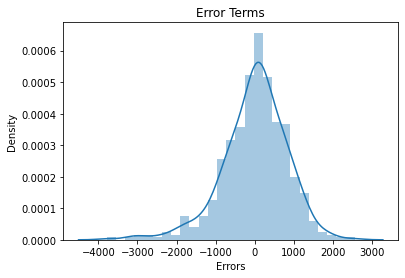

In [83]:
plot_res_dist(y_train, y_train_pred)


#### Things seem good as all error terms are normally distributed and has a mean value of 0

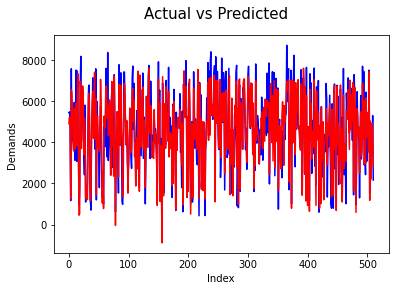

In [84]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Actual and predicted almost follows the same model, hence this model seems fine

In [ ]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

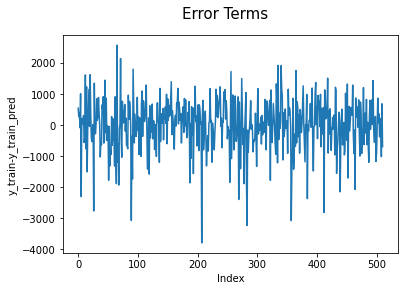

In [86]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

#### From the above plot, we can mention if the error terms are not correlated to each other. 

### Print R-squared Value for training set


In [92]:

r2_score(y_train,y_train_pred)

0.814695153378915

#### R2 score is same as we got in the model 

### Checking the linearity 

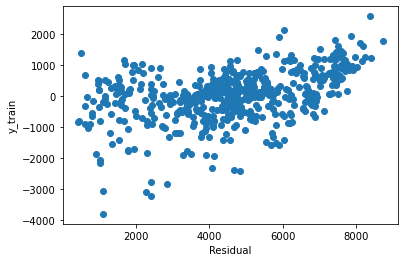

In [88]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### Predicting values for the test set 

In [89]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','days_old_business']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [90]:
#Columns from our final model
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

### R-squared value for test predictions 

In [91]:
r2_score(y_test,y_test_pred)


0.8109384786253464

#### Inference 

R2 value for test set is 0.810 same as R2 value for training set 0.814. Hence, we can tell that our model performs well on even the unseen data

### Checking Homoscedasticity 

Text(0, 0.5, 'y_test_pred')

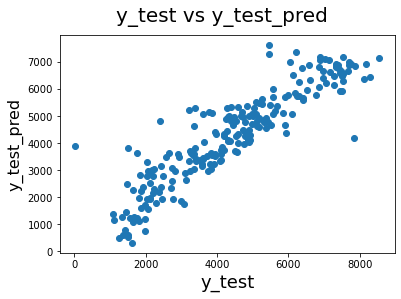

In [93]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

#### Inference 

As the value of predcitors changes, the error terms does not change. 

### Plotting actual versus predicted test values 

In [94]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

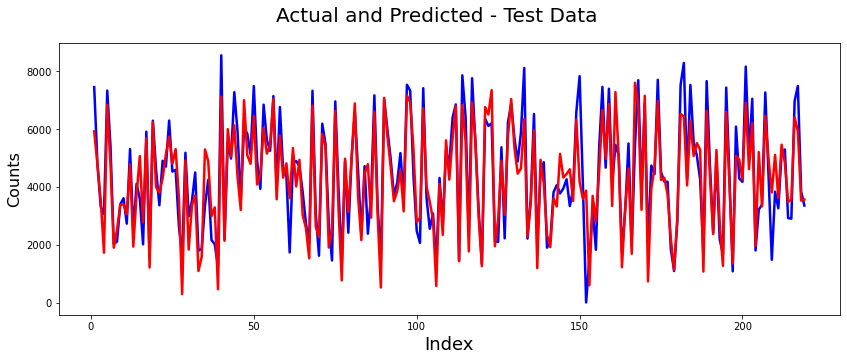

In [95]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

#### Inference 

The predictions for test set data is almost same as the actual data set. 

### Plotting error terms for test data

In [96]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

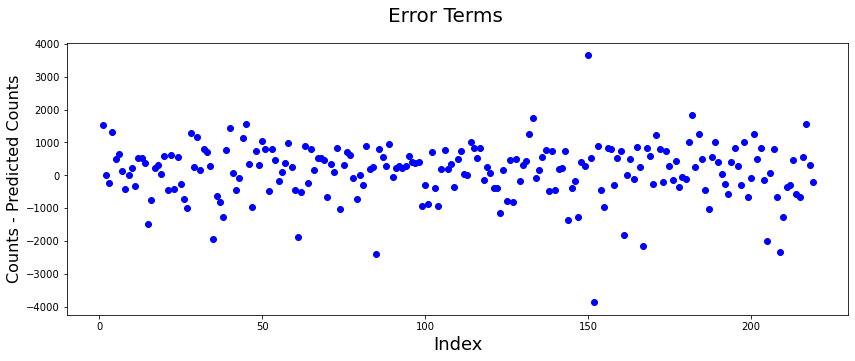

In [97]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

#### Inference 

The error terms does not follow any pattern and they are randomnly distributed. Hence, this is the model that best explains the relationship between target variable and predictors. 

### Interpretation of results 

1. The company Boombikes should expand their business during the Spring season
2. The company should expand their business during the September month 
3. Based on the readings and observations of previous data, once the situation resumes normal after COVID-19, the demand for ridesharing bikes will definitely increase than what it was in 2019.
4. The bike bookings during rain or light snow is less, so the company could use this time for repairing, testing or servicing their bikes. 

## Overall suggestion

When the situation resumes normal, boombikes should come with new offers during Spring season and increase their advertising during September as business would be at its best, during these times. 

### Significant variables that predicts the demand for shared bikes

1. Windspeed
2. Temp
3. hum
4. Season
5. Months(July, Jan, Sep, Nov, Dec)
6. Year (2019)
7. Weathersit (Light snow, mist, cloudy)